<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Монтуємо Google Drive
drive.mount('/content/drive')

# Шлях до файлу на Google Drive
path = '/content/drive/My Drive/Colab Notebooks/HW_2/bestsellers with categories.csv'

# Читаємо CSV файл
df = pd.read_csv(path)

# Виводимо перші рядки DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [15]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?
**Dataset save data about 351 name's of books**

In [16]:
df['Name'].nunique()

351

In [17]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [18]:
df.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

In [19]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [20]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
**NO**

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [21]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
**Two types of genre:
1: Non Fiction
2: Fiction**

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

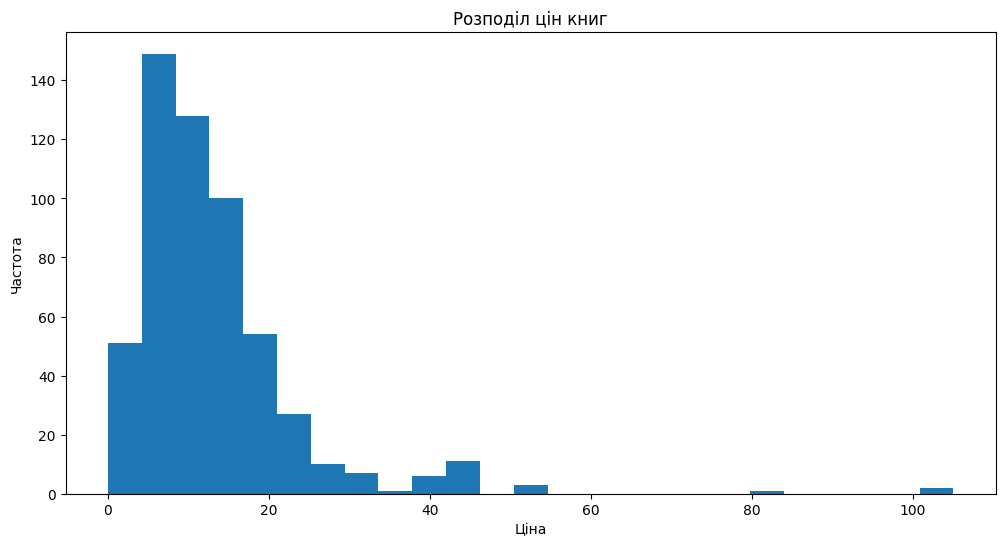

In [23]:
# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', bins=25, figsize=(12, 6))
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін книг')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [24]:
# Визначення максимальної ціни
max_price = df['price'].max()
print("Максимальна ціна:", max_price)

# Визначення мінімальної ціни
min_price = df['price'].min()
print("Мінімальна ціна:", min_price)

# Визначення середньої ціни
mean_price = df['price'].mean()
print("Середня ціна:", mean_price)

# Визначення медіанної ціни
median_price = df['price'].median()
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Максимальна ціна? **105**
Мінімальна ціна? **0**
Середня ціна? **13.1**
Медіанна ціна? **11.0**

Який рейтинг у датасеті найвищий? Відповідь: **4.9**

In [25]:
max_user_rating = df['user_rating'].max()
print("Максимальний рейтинг:", max_user_rating)

Максимальний рейтинг: 4.9


Скільки книг мають такий рейтинг? Відповідь: **28**

In [64]:
# Фільтрація книг з максимальним рейтингом
books_with_max_rating = df[df['user_rating'] == max_user_rating]
unique_books = books_with_max_rating.drop_duplicates(subset='name')
# Кількість книг з максимальним рейтингом
num_books_with_max_rating = len(unique_books)

print("Кількість книг з найвищим рейтингом:", num_books_with_max_rating)
unique_books_sorted = unique_books.sort_values(by='year')
print(unique_books_sorted)

# Налаштування відображення даних
pd.set_option('display.max_columns', 7)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)


Кількість книг з найвищим рейтингом: 28
                                                                                                                        name                 author  user_rating  reviews  price  year        genre
187                                                Jesus Calling: Enjoying Peace in His Presence (with Scripture References)            Sarah Young          4.9    19576      8  2011  Non Fiction
146                          Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)   Sherri Duskey Rinker          4.9     7038      7  2012      Fiction
245                                                                                                Oh, the Places You'll Go!              Dr. Seuss          4.9    21834      8  2012      Fiction
476                                                                                              The Very Hungry Caterpillar             Eric Carle          4.9    19546      5

Яка книга має найбільше відгуків? Відповідь: **87841**

In [27]:
max_reviews = df['reviews'].max()
book_with_max_reviews = df[df['reviews'] == max_reviews]
print("Книга з найбільшою кількістю відгуків:")
print(book_with_max_reviews[['name', 'reviews']])

Книга з найбільшою кількістю відгуків:
                        name  reviews
534  Where the Crawdads Sing    87841


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: **"174  Humans of New York : Stories  Brandon Stanton     17"**

In [28]:
# Відфільтрувати датафрейм за умовою року публікації 2015
top_50_2015 = df[(df['year'] == 2015) & (df['user_rating'] > 4.8)]

# Знайти книгу з максимальною ціною серед цього піднабору
most_expensive_book = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]

# Вивести інформацію про найдорожчу книгу
most_expensive_book_info = most_expensive_book[['name', 'author', 'price']]
print("Найдорожча книга серед Топ-50 у 2015 році:")
print(most_expensive_book_info)


Найдорожча книга серед Топ-50 у 2015 році:
                             name           author  price
174  Humans of New York : Stories  Brandon Stanton     17


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: **20**

In [77]:
top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].drop_duplicates(subset=['name']).shape[0]
print("Кількість книг жанру Fiction у Топ-50 у 2010 році:", top_50_2010)

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:**1**


In [89]:

# Відфільтруємо книги з рейтингом 4.9 у 2010 та 2011 роках
rating_4_9 = df[(df['year'].isin([2011, 2012])) & (df['user_rating'] == 4.9)]

# Виберемо унікальні книги
unique_sort_books = rating_4_9.drop_duplicates(subset='name')

# Порахуємо кількість унікальних книг
num_unique_books = len(unique_sort_books)

# Відсортуємо за зростанням по рокам
unique_books_sorte = unique_sort_books.sort_values(by='year')

# Виведемо кількість унікальних книг
print("Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках:", num_unique_books)


# Виведемо назви унікальних книг за зростанням по рокам
print("\nНазви унікальних книг з рейтингом 4.9:\n")
for index, row in unique_books_sorte.iterrows():
    print(f"Назва: {row['name']}, Автор: {row['author']}\n")

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 3

Назви унікальних книг з рейтингом 4.9:

Назва: Jesus Calling: Enjoying Peace in His Presence (with Scripture References), Автор: Sarah Young

Назва: Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids), Автор: Sherri Duskey Rinker

Назва: Oh, the Places You'll Go!, Автор: Dr. Seuss



І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [95]:
# Фільтруємо книги за умовами
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]

# Порахуємо кількість унікальних книг
num_unique_books = len(books_2015_under_8)

# Вибираємо унікальні книги за назвою
unique_books_2015_under_8 = books_2015_under_8.drop_duplicates(subset='name')

# Сортуємо за зростанням ціни
sorted_unique_books_2015_under_8 = unique_books_2015_under_8.sort_values(by='price')

# Виводимо відсортовані унікальні книги

print("Унікальні книги з рейтингу 2015 року, що коштують менше за 8 доларів, відсортовані за зростанням ціни:\n")
print("Кількість книг з рейтингу 2015 року, що коштують менше за 8 доларів:", num_unique_books)
print(sorted_unique_books_2015_under_8[['name', 'author', 'price']])


Унікальні книги з рейтингу 2015 року, що коштують менше за 8 доларів, відсортовані за зростанням ціни:

Кількість книг з рейтингу 2015 року, що коштують менше за 8 доларів: 17
                                                                                               name              author  price
507                                                                           To Kill a Mockingbird          Harper Lee      0
210                                                                   Laugh-Out-Loud Jokes for Kids         Rob Elliott      4
206                                                                      Knock-Knock Jokes for Kids         Rob Elliott      4
111                                                                                 First 100 Words        Roger Priddy      4
123                                                                            Giraffes Can't Dance       Giles Andreae      4
54                                      Creative Haven Creativ

Яка книга остання у відсортованому списку? Відповідь: ** **

In [102]:
# Виводимо останню книгу у відсортованому списку рядочком
last_book = sorted_unique_books_2015_under_8.iloc[-1]
print(f"\nОстання книга у відсортованому списку: {last_book['name']} by {last_book['author']} - ${last_book['price']}")


Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10) by Jeff Kinney - $7
